# Overview


Then, the class itself. We kick things off with my short (and hilarous) intro to today, then cover a few more  administrative things. 

It might seem boring to hear about admin, **but this is the stuff you need to know to do well in the class**. So I recommend watching and paying attention!

Then, we kick into gear and get started on the actual work. This week is about getting familiar with networks, and we'll focus on four main elements

* A short talk on the basic mathematical description of networks
* The `NetworkX` library 
* Matplotlib, binning, and plotting degree distributions
* Random networks

(The work-load is still a little bit light, since we want to allow those who are not super-strong at programming a bit of time to catch up. If you're bored and in need of extra work, let me know and I'll point you in the right direction.)

## The Informal Intro

Ok. In the video below I discuss

 * How it's going with COVID-19
 * Some background and context on what we'll be learning about in class today
 * Where we are with the admin stuff (how to take the class)
 * **An overview of the rest of the semester**. This last part is especially important for you to know about.

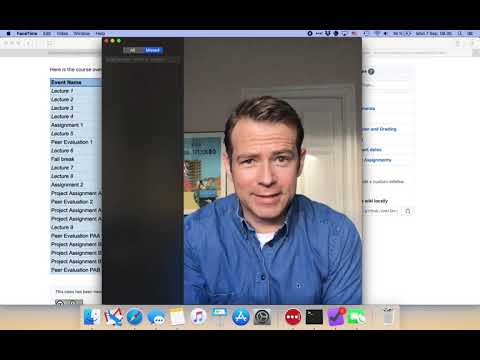

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("XkDtCQOx8Xk",width=800, height=450)

# Part 0: The Admin Stuff 
### (GitHub Page Overview Edition)

Last week, I gave you a lot of practical information about how to follow the class. 

In addition to a lot of (boring) information about COVID and my unusual precautions, I discussed the principles of how I teach. 
How each lecture is structured to maximize your learning according to state-of-the-art principles. 

This week, the admin video talks about the structure of the Course Page, which actually contains a lot of useful information. 

You'll notice that I've made it for the class that runs in the fall (Social Graphs and Interactions), but the web-page struture is similar, so everyhting should still work.

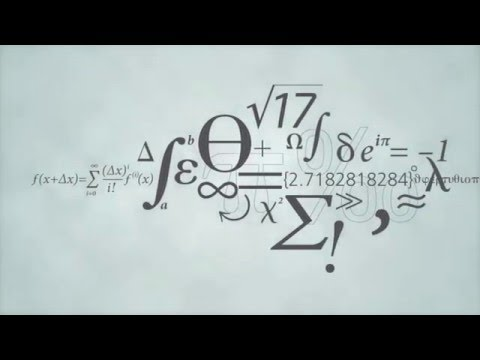

In [4]:
YouTubeVideo("42KjmxgYYNI",width=800, height=450)

Next week, I'll talk about the final elements of admin we have to cover for now

* Forming groups
* Handing in assignments
* Peer Evaluations
* The structure of the class

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. I love networks, so I'll take some time time today to tell you about them.

> **_Video Lecture_**. Then check out a few comments on "Network Notation" (don't worry it's short). 

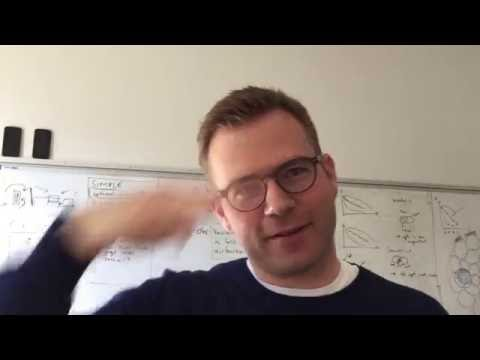

In [5]:
YouTubeVideo("MMziC5xktHs",width=800, height=450)

Now for some reading

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
>
> * Read chapter 2\.
> 

And the associated exercises

> *Exercises*: Chapter 2 in *Network Science*.
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 
> There are more questions on Chapter 2 below.
> 

---

*The neurons of the brain are often organized as a densely connected network.*

http://www.network-science.org/highly-connected-society-dense-social-complex-networks.html

---

# Part 2: Exercises using the `NetworkX` library

Let's try to solve a few of the exercises from the book using `NetworkX`

> *Exercises*:
> 
> * Go to NS Section 2.12: Homework, then
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 
>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it).
>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-diagonal" (all elements are away from the diagonal blocks). 
>     - *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipatite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).
> 

## Exercises:

### Exercise 2.1 ('The 'Königsberg Problem')

All execpt B can. B cannot as it has two nodes with uneven degree. In fact four nodes have degree 3.


### Exercise 2.3 ('Graph representation')

In [82]:
import networkx as nx
import numpy as np
adj_a = np.array([
    [0,1,1,1,0,1],
    [1,0,1,1,0,0],
    [1,1,0,0,0,1],
    [1,1,0,0,0,0],
    [0,0,0,0,0,0],
    [1,0,1,0,0,0],
])

adj_b = np.array([
    [0,1,0,0,0,0],
    [0,0,1,1,0,0],
    [1,1,0,0,0,0],
    [1,0,0,0,0,0],
    [0,0,0,0,0,0],
    [1,0,1,0,0,0],
])

ga = nx.from_numpy_matrix(adj_a)
gb = nx.from_numpy_matrix(adj_b)

The corresponding link lists is generated with `.edges` method note that Python is zero index rather than 1-index.

In [15]:
print(ga.edges)
print(gb.edges)

[(0, 1), (0, 2), (0, 5), (0, 3), (1, 2), (1, 3), (2, 5)]
[(0, 1), (0, 3), (0, 5), (1, 2), (1, 3), (2, 2), (2, 5)]


#### Determine the average clustering coefficient of the network shown in Image 2.20a

$$ C_{i}=\frac{2 L_{i}}{k_{i}\left(k_{i}-1\right)} $$

In [179]:
def avg_cluster_coef(adj):
    n, p = np.shape(adj)
    C = np.zeros(n)

    k = adj.sum(axis = 0)
    L = np.zeros(n)
    for i in range(n):

        neighbours = np.where(adj[i] == 1)[0]

        L[i] = adj[neighbours][:, neighbours].sum() / 2

        # incase no neighbours
        if k[i] <= 1:
            C[i] = 0
        else:
            C[i] = (2 * L[i])/(k[i]*(k[i] - 1))
    
    return C
    

In [180]:
avg_cluster_coef(adj_a)

array([0.5       , 0.66666667, 0.66666667, 1.        , 0.        ,
       1.        ])

In [170]:
nx.average_clustering(ga)

0.6388888888888888

#### If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?
This can be achieved by switching between the two row of node 5 and 6. In the link list all the 5 and 6 have to swapped.

#### What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?
If you have a dense network the link list quickly becomes very long, and thus the adjacency matrix might give a better overview. I myself like the adjacency matrix more, but it really is preference and you can always go from one to another.

#### In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?

In [196]:
np.linalg.matrix_power(adj_a, 3)[0,2]

7

In [197]:
np.linalg.matrix_power(adj_b, 3)[0,2]

0

#### With the help of a computer, count the number of cycles of length 4 in both networks.

If we allow for repetions

In [203]:
np.trace(
    np.linalg.matrix_power(adj_a, 4)
)

86

In [205]:
np.trace(
    np.linalg.matrix_power(adj_b, 4)
)

2

### Exercise 2.5 ('Bipartite Networks')

**A) Construct its adjacency matrix. Why is it a block-diagonal matrix?**

In [439]:
adj_BN = np.array([
    [0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,1,1,0],
    [0,0,0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,0,0,0,0,1],
    [1,0,1,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,1,1,0,0,0,0,0],
])

The first nodes never visit each other. The same goes for the last nodes. This is what gives it the peculiar adjacency matrix.

**b) Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.**


In [400]:
adj_purple = np.array([
    [0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0],
    [1, 1, 0, 0, 1, 0],
    [0, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
])

adj_green = np.array([
    [0, 1, 1, 0, 0],
    [1, 0, 1, 0, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
])

g_purple = nx.from_numpy_matrix(adj_purple)
g_green = nx.from_numpy_matrix(adj_green)

**c) Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.**

In [448]:
print(adj_BN[6:, :].sum(axis =1).sum()/6)

print(adj_BN[:-5, :].sum(axis =1).sum()/5)

1.6666666666666667
2.0


**d) Calculate the average degree in each of the two network projections. Is it surprising that the values are different from those obtained in point (c)?**

In [449]:
print( np.mean(list(dict(g_purple.degree).values())) ) 
print( np.mean(list(dict(g_green.degree).values())) )

2.6666666666666665
2.0


> **_Video Lecture_**: Once again, it's time to stop working for a couple of minutes to hear me talk about plotting with `NetworkX`. 
> 

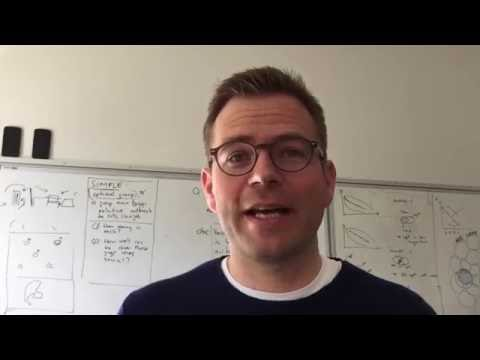

In [6]:
YouTubeVideo("iDlb9On_TDQ",width=800, height=450)

# Part 3: Plotting degree distributions

As always we'll learn about degree-distribution plotting by creating a `notebook` and trying it out. 

As a little public service announcement about this exercise: I know that you've probably tried binning data before. And that there are many functions designed to make binning easy, so there is a good chance that you think that binning data into bins is something that you don't have to worry about.

**BUT** ... with this exercise, I aim to convince you that binning isn't always trivial. And that there are key things to think about every time you need to put data into buckets. So please read the exercise carefully. And follow my instructions carefully.


> 
> *Exercises*:
> 
> Begin by importing the right packages. Start by importing `matplotlib.pyplot` (for plotting), `numpy` (for binning and other stuff), 
> `random` (for generating random numbers), and `networkx` (for generating networks.)
> 
> * Binning real numbers
>   * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
>   * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
>   * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
> * Binning integers
>   * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
> Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out 
> `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution 
> characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
>   * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 
> Create a vector $v$
> that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, 
> and the last bin contains the maximum number. 
> Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. 
> What is the sum over bin counts? Explain how the binning-vectors first and last element 
> relates to the min and max from the Poisson distribution.
>   * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
> * Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
> First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
> **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average 
> degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
>   * Now, use `networkx` to create the graph and extract the degree distribution.
>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
> 

In [264]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
np.random.seed(42)

### Binning real numbers

In [260]:
r = np.random.normal(loc = 2, scale=0.125, size=5000)
hist, bin_edges = np.histogram(r, bins = 10)

In [262]:
x = np.repeat(bin_edges, 2)[1:-1]
y = np.repeat(hist, 2)

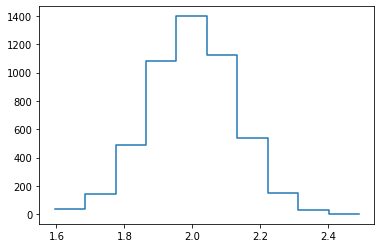

In [263]:
plt.plot(x,y)

### Binning integers

In [355]:
r = np.random.poisson(lam = 10, size = 5000)
r_min = r.min()
r_max = r.max()
v = np.arange(r_min, r_max+2) 

In [357]:
hist, bin_edges = np.histogram(r, bins = v - 1/2)

<BarContainer object of 23 artists>

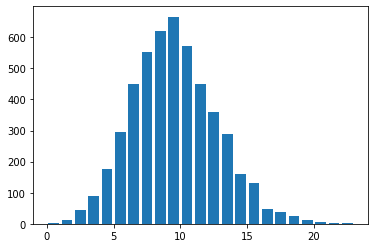

In [367]:
plt.bar(v[:-1], hist)

### Binning and plotting degree distributions

In [372]:
N = 5000
k = 10
g_er = nx.erdos_renyi_graph(n = N, p = k/(N-1))

<BarContainer object of 25 artists>

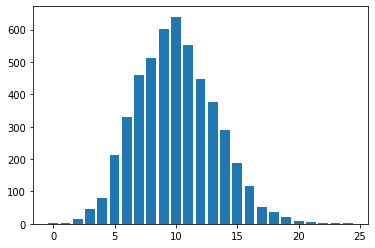

In [382]:
edges = np.array([edges for node, edges in g_er.degree()])

g_min = edges.min()
g_max = edges.max()
v = np.arange(g_min, g_max+2) 

hist, bin_edges = np.histogram(edges, bins = v - 1/2)
plt.bar(v[:-1], hist)

# Part 4: Random networks

> **_Video Lecture_**. Now it's time to relax and watch a few minutes of info on _Random Networks_. 

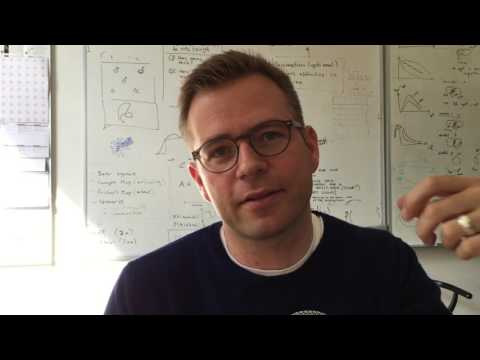

In [7]:
YouTubeVideo("c_SbQCzgqb0",width=800, height=450)

> _Reading_. Read section 3.1-3.7 (the most important part is 3.1-3.4) of Chapter 3 of _Network Science_. You can find the entire book [**here**](http://barabasi.com/networksciencebook/).


> _Exercises_ (should be completed in a `notebook`):
> 
> * Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
> * Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
>   * Extract the Giant Connected Component, GCC. (Hint: You can use `networkx.connected_component_subgraphs` <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use `nx.connected_components(G)` and `G.subgraph(c).copy()`)
>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

## Exercise 3.1 ('Erdős-Rényi Networks').
Consider an Erdős-Rényi network with $N = 3,000$ nodes, connected to each other with probability $p = 10–3$.

#### What is the expected number of links〈L〉
\begin{align}
    \langle L \rangle &=\frac{p N(N-1)}{2}
\end{align}

In [482]:
p = 0.001
N = 3000
k = p*(N-1)

L = p*N*(N-1)/2
print(L)
print(k)

4498.5
2.999


#### In which regime is the network?
1. Subcritial: $\langle k \rangle < 1$ 
1. Supercritical: $\langle k \rangle \geq 1$ 
1. Fully Connected: $\langle k \rangle \geq \log N$ 

In [477]:
if k < 1:
    print('Rubcritical Regime')
elif k >= 1:
    if k < np.log(n):
        print('Supercritical Regime:')
    else:
        print('Fully connected Regime:')

subcritical


#### Calculate the probability $p_c$ so that the network is at the critical point
To be at the critical point $k=1$ thus:
\begin{align}
    k &= p \cdot (N-1) \\
    1 &= p \cdot (N-1) \\
      &\Updownarrow \\
    p  &= \frac{1}{(N-1)}
\end{align}

In [484]:
print('p = {} in order to be at the critical point'.format( 1/(N-1) ))

p = 0.00033344448149383126 in order to be at the critical point


#### Given the linking probability $p = 10–3$, calculate the number of nodes $N^{cr}$ so that the network has only one component.

In order to only have one component the network needs to be in fully connected domain which is achived at 
$$\langle k \rangle  \; \geq \;  \log(N) \Leftrightarrow p \geq \frac{\log(N)}{N}$$

So we have to determine
\begin{align}
    P &= \frac{\log(N)}{N} \\
      &\Updownarrow \\
    N &= \exp(-W(-P)) 
\end{align}
Where $W$ is the product log function. Or it can be achived by simply seeing when  $p \geq \frac{\log(N)}{N}$

In [505]:
n = np.arange(1,10000)
p = 0.001
val = np.log(n)/n

idx = np.where(0.001 > val)[0][0:2]

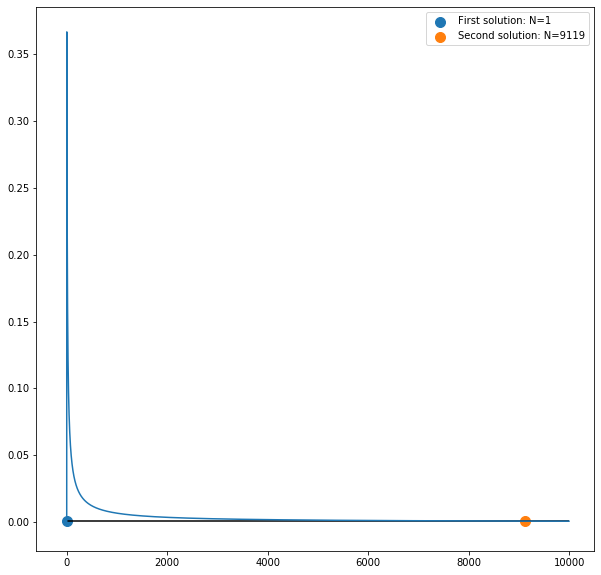

In [535]:
plt.figure(figsize=(10,10))
plt.plot(val)
plt.hlines(0.001,1, 10000)
plt.scatter(n[idx[0]], p, s=100, label = "First solution: N={0}".format(n[idx[0]]))
plt.scatter(n[idx[1]], p, s=100, label = "Second solution: N={0}".format(n[idx[1]]))
plt.legend()

#### For the network in $(d)$, calculate the average degree $\langle k^{cr} \rangle$ and the average distance between two randomly chosen nodes $\langle d \rangle$

## Plot a random network with 200 nodes and an average degree of 1.5.

In [551]:
N = 200
k = 1.5
g_er = nx.erdos_renyi_graph(n = N, p = k/(N-1))

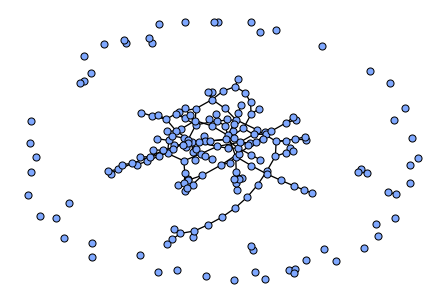

In [571]:
nx.draw_spring(
    G = g_er, 
    node_size = 50, 
    node_color = '#7FA8FF', 
    node_shape = 'o',
    edge_color = 'k',
    with_labels = False, 
    width = 1.3, 
    edgecolors='k') 
plt.draw()

#### Extract the Giant Connected Component, GCC

In [577]:
nx.connected_component_subgraphs(g_er)

AttributeError: module 'networkx' has no attribute 'connected_component_subgraphs'

#### Choose a node at random from the GCC.

In [575]:
print(nx.__version__)

2.4


#### Find all nodes that are precisely 2 steps away from that node.

#### Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw() and reading the documentation carefully find out how to color individual nodes.